<a href="https://colab.research.google.com/github/LisethTiria/Biosenales-2025-1/blob/main/proyecto_1_biosenales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# %%
# Esta celda importa las librerías necesarias para el análisis de datos,
# visualización, procesamiento de señales y pruebas estadísticas.
import numpy as np  # Librería fundamental para cálculos numéricos
import pandas as pd  # Librería para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Librería para graficar y visualizar datos
import scipy.io as sio  # Operaciones de entrada/salida, especialmente para archivos .mat
import scipy.signal  # Herramientas de procesamiento de señales
from scipy.signal import find_peaks  # Función para la detección de picos
from scipy import signal # Procesamiento de señales
from scipy.stats import levene, ttest_ind, mannwhitneyu, shapiro  # Pruebas estadísticas
from google.colab import drive  # Específico de Google Colab, para montar Google Drive
from statsmodels.tsa.stattools import adfuller
import random
import os
import zipfile

In [63]:

# %%
# Esta celda monta Google Drive para acceder a los archivos de datos y luego
drive.mount('/content/drive')  # Monta Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:

# Carga el archivo 'Diagnostics.xlsx' desde Google Drive
diag = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Biosenales/Diagnostics.xlsx')

# Muestra las primeras filas del DataFrame para verificar la carga correcta
print(diag.head())


                     FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1   

In [65]:
# Análisis de la prevalencia de arritmias

# 1. Prevalencia general de arritmias
arritmia_counts = diag['Rhythm'].value_counts()
arritmia_counts=arritmia_counts.astype(str)
print("\nPrevalencia de arritmias:\n", arritmia_counts)

# 2. Prevalencia por género
arritmia_por_genero = diag.groupby('Gender')['Rhythm'].value_counts(normalize=True) * 100
arritmia_por_genero=arritmia_por_genero.round(3).astype(str)+' %'
print("\nPrevalencia de arritmias por género:\n", arritmia_por_genero)

# 3. Prevalencia por edad
# Agrupar por rangos de edad (ejemplo: 0-10, 11-20, etc.)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Define los rangos de edad
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Crea etiquetas para los rangos
diag['AgeGroup'] = pd.cut(diag['PatientAge'], bins=bins, labels=labels, right=False)  # Crea la columna de grupos de edad

arritmia_por_edad = diag.groupby('AgeGroup')['Rhythm'].value_counts(normalize=True) * 100
arritmia_por_edad=arritmia_por_edad.round(3).astype(str)+' %'
print("\nPrevalencia de arritmias por grupo de edad:\n", arritmia_por_edad)


# 4. Rango de edades y arritmias para entrenar algoritmos
# Se recomienda usar rangos de edad y arritmias con mayor cantidad de datos representativos
#  y considerando la distribución de datos en las diferentes categorías
print("\nRango de edades y arritmias para entrenar algoritmos (ejemplo):")
print("Rangos de edad con mayor cantidad de datos representativos")
print("Arritmias con mayor prevalencia o interés clínico")

# 5. Coincidencia con la literatura
# Se debe comparar los resultados obtenidos con la literatura científica relevante para las arritmias.
print("\nComparación con la literatura:")
print("Requiere revisión de la literatura y comparar las prevalencias encontradas.")

# 6. Otros análisis propuestos
print("\nOtros análisis propuestos:")
print("1. Análisis de correlación entre variables fisiológicas (ej. Edad, Frecuencia ventricular, etc.) y tipo de arritmia.")
print("2. Análisis de la distribución de otras variables como QRS Duration, QT Interval, etc. según tipo de arritmia.")
print("3. Análisis de series temporales para evaluar patrones en los datos electrocardiográficos.")
print("4. Análisis multivariado para identificar combinaciones de variables predictivas de arritmias.")
print("5. Validación cruzada de los modelos de aprendizaje.")





Prevalencia de arritmias:
 Rhythm
SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: count, dtype: object

Prevalencia de arritmias por género:
 Gender  Rhythm
FEMALE  SB        30.021 %
        SR        21.834 %
        ST        16.397 %
        AFIB      15.757 %
        SVT        6.567 %
        AF         4.009 %
        SA         3.753 %
        AT         1.215 %
        AVNRT      0.256 %
        SAAWR      0.128 %
        AVRT       0.064 %
MALE    SB        41.655 %
        AFIB      17.478 %
        SR        13.465 %
        ST        13.415 %
        SVT        4.684 %
        AF         4.315 %
        SA         3.744 %
        AT         1.075 %
        AVRT       0.084 %
        AVNRT      0.067 %
        SAAWR      0.017 %
Name: proportion, dtype: object

Prevalencia de arritmias por grupo de edad:
 AgeGroup  Rhythm
0-9       SA        49.138 %
          ST

<ipython-input-65-809ae18792f4>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arritmia_por_edad = diag.groupby('AgeGroup')['Rhythm'].value_counts(normalize=True) * 100


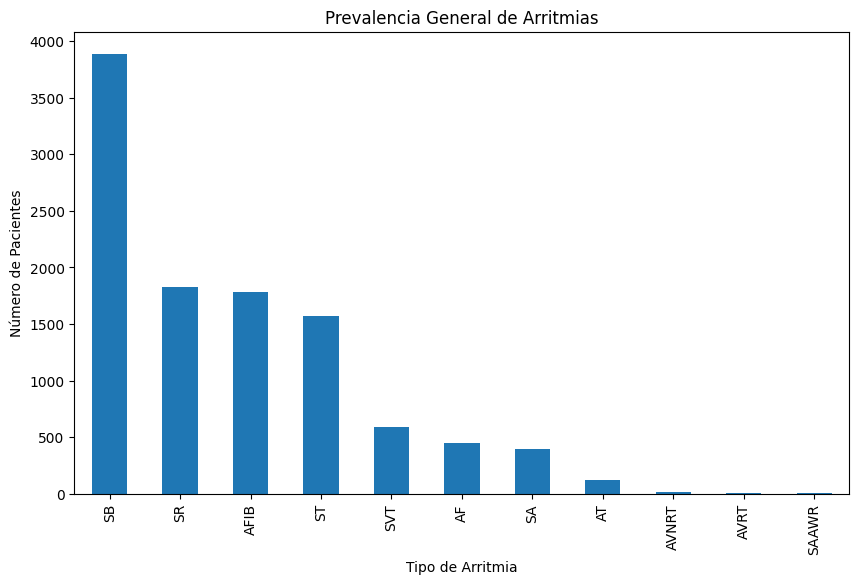

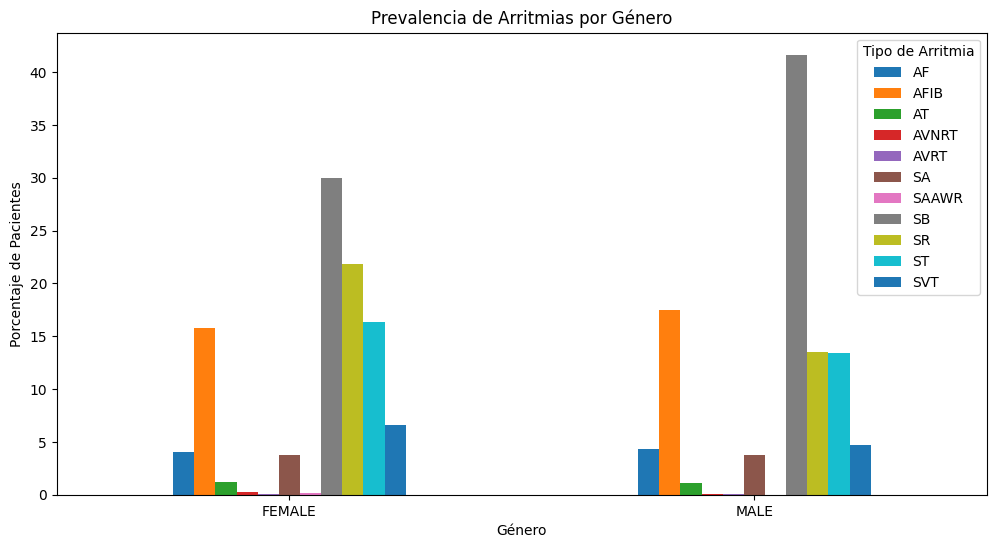

<ipython-input-66-e44f0cf317d5>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arritmia_por_edad = diag.groupby('AgeGroup')['Rhythm'].value_counts(normalize=True).unstack() * 100


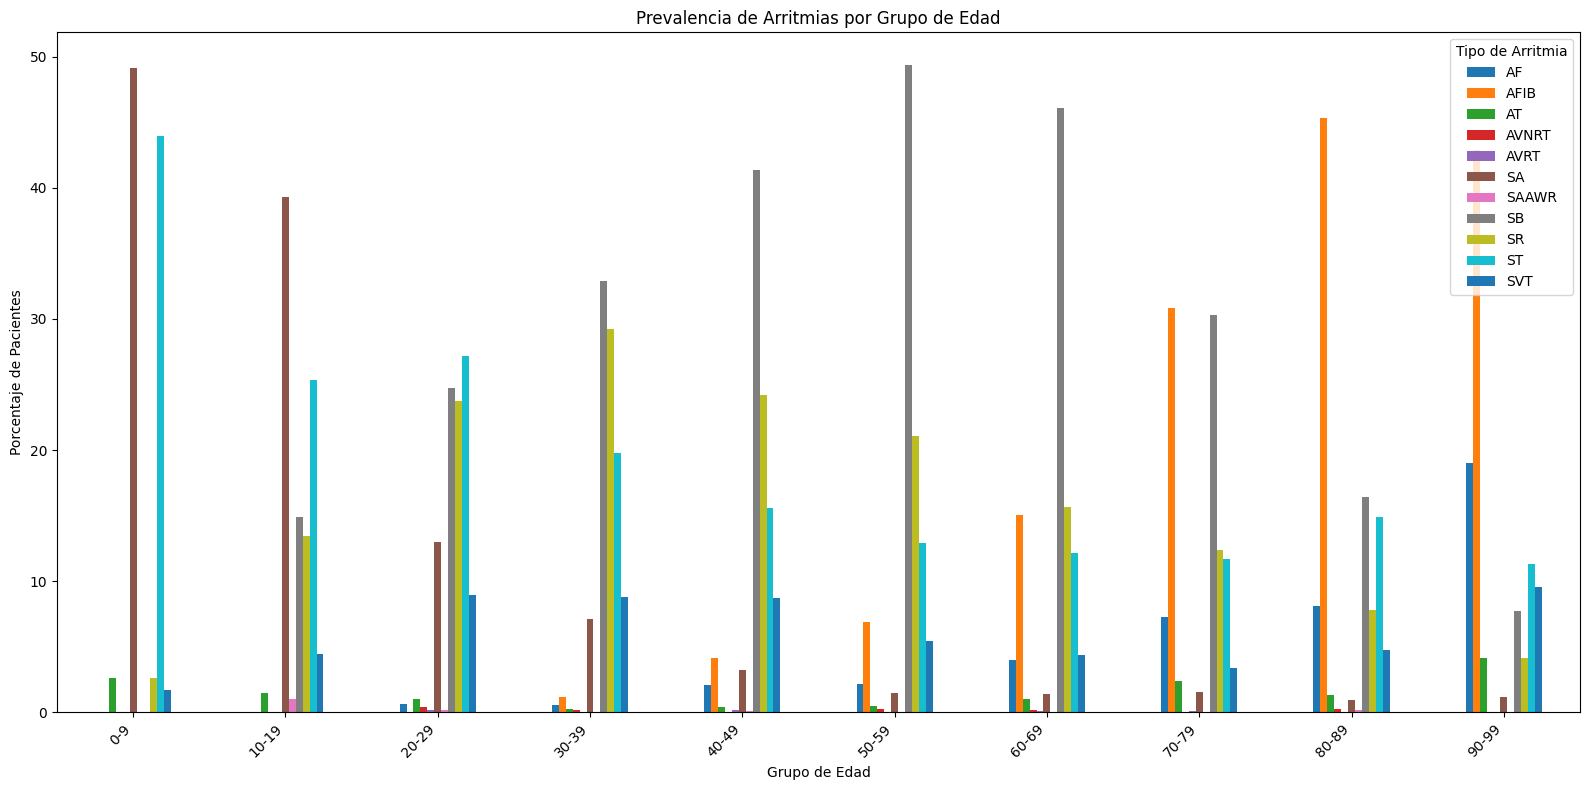

In [66]:


# Prevalencia general de arritmias
plt.figure(figsize=(10, 6))
diag['Rhythm'].value_counts().plot(kind='bar')
plt.title('Prevalencia General de Arritmias')
plt.xlabel('Tipo de Arritmia')
plt.ylabel('Número de Pacientes')
plt.show()

# Prevalencia por género
arritmia_por_genero = diag.groupby('Gender')['Rhythm'].value_counts(normalize=True).unstack() * 100
arritmia_por_genero.plot(kind='bar', figsize=(12, 6))
plt.title('Prevalencia de Arritmias por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Arritmia')
plt.show()


# Prevalencia por edad
arritmia_por_edad = diag.groupby('AgeGroup')['Rhythm'].value_counts(normalize=True).unstack() * 100
arritmia_por_edad.plot(kind='bar', figsize=(16, 8))
plt.title('Prevalencia de Arritmias por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Arritmia')
plt.tight_layout()
plt.show()


In [67]:

sb_files = diag[diag['Rhythm'] == 'SB']['FileName'].tolist()
sr_files = diag[diag['Rhythm'] == 'SR']['FileName'].tolist()


In [68]:
sb_files = [f + '.csv' for f in diag[diag['Rhythm'] == 'SB']['FileName'].tolist()]
sr_files = [f + '.csv' for f in diag[diag['Rhythm'] == 'SR']['FileName'].tolist()]

In [69]:

!pip install neurokit2
!pip install detectors
import neurokit2 as nk
import detectors as dt


In [70]:
# Seleccionar 20 elementos al azar de cada lista añañaaa
sampled_sb = random.sample(sb_files, 20)
sampled_sr = random.sample(sr_files, 20)

# Crear carpetas de destino
base_extract_dir = '/content/'
sb_extract_dir = os.path.join(base_extract_dir, 'sb_records')
sr_extract_dir = os.path.join(base_extract_dir, 'sr_records')
os.makedirs(sb_extract_dir, exist_ok=True)
os.makedirs(sr_extract_dir, exist_ok=True)

# Ruta al archivo zip
zip_filepath = '/content/drive/MyDrive/Colab Notebooks/Biosenales/ECGDataDenoised.zip'

# Archivos deseados, mapeados a su carpeta de destino
desired_files = {name: sb_extract_dir for name in sampled_sb}
desired_files.update({name: sr_extract_dir for name in sampled_sr})

with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    for zip_info in zip_ref.infolist():
        # Obtener solo el nombre del archivo sin ruta
        filename = os.path.basename(zip_info.filename)
        if filename in desired_files:
            # Leer contenido del archivo dentro del zip
            with zip_ref.open(zip_info) as source_file:
                # Escribirlo en la carpeta correspondiente
                output_path = os.path.join(desired_files[filename], filename)
                with open(output_path, 'wb') as out_file:
                    out_file.write(source_file.read())
            print(f"Archivo '{filename}' extraído a '{desired_files[filename]}'")

Archivo 'MUSE_20180112_134053_01000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180112_134805_87000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180113_071734_35000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180113_130153_59000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_065616_49000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_070143_41000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_071835_71000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_115407_34000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_122133_98000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180114_132925_01000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180115_124515_42000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180115_124619_82000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180115_125020_17000.csv' extraído a '/content/sb_records'
Archivo 'MUSE_20180115_134530_02000.cs

In [71]:
# prompt: De la variable diag donde están los datos de las arritmias quiero seleccionar 20 registros del ritmo SB y seleccionar 20 registros de SR.
# Como se va a validar la capacidad de la herramienta de análisis los criterios
# de selección deben tener en cuenta que patrones se esperan anormales en las
# arritmias y cómo se podrían detectar en las librerías usadas.
# Para cada uno de los 20 registros se debe:
# 1. Detectar los picos R utilizando la función de la librería NeuroKit.
# 2. Detectar los picos R utilizando la función de la librería Detectors
# (py-ecg-detectors).
# 3. ¿Cuál  de los algoritmos detecta mejor los picos R? Sustentar desde los
# datos
# 4. ¿Qué otras rutinas incluyen las librerías que puedan ser de interés para
# detectar diferencias en las arritmias (detección de otros picos o
# segmentos relevantes)
# Las librerías ya fueron importadas como NeuroKit(nk) y Detectors(dt)

# Select 20 records for each rhythm (SB and SR)
sb_records = diag[diag['Rhythm'] == 'SB'].sample(n=20)
sr_records = diag[diag['Rhythm'] == 'SR'].sample(n=20)

# Function to process a single record and detect R-peaks
def process_record(record):
    # Assuming 'ECG' column contains the ECG signal data
    try:
        ecg_signal = record['ECG'] # Replace with actual column name if different

        # NeuroKit R-peak detection
        signals, info = nk.ecg_process(ecg_signal, sampling_rate=record['Sampling Rate'])  # Replace with actual sampling rate column name if different
        nk_rpeaks = signals['ECG_R_Peaks']

        # Detectors R-peak detection
        dt_rpeaks = dt.detect_peaks(ecg_signal, record['Sampling Rate']) # Replace with actual sampling rate column name if different


        # Comparison and other analysis would go here
        # (e.g. calculate accuracy, precision, recall)

        return nk_rpeaks, dt_rpeaks

    except (KeyError, TypeError) as e:
        print(f"Error processing record: {e}")
        return None, None

# Process all selected records
nk_rpeaks_results = []
dt_rpeaks_results = []
for index, row in sb_records.iterrows():
  nk_rpeaks, dt_rpeaks = process_record(row)
  nk_rpeaks_results.append(nk_rpeaks)
  dt_rpeaks_results.append(dt_rpeaks)

for index, row in sr_records.iterrows():
  nk_rpeaks, dt_rpeaks = process_record(row)
  nk_rpeaks_results.append(nk_rpeaks)
  dt_rpeaks_results.append(dt_rpeaks)


#Further analysis and comparison of results can be done here.
# Example: Comparing the number of detected peaks, the location of detected peaks.
# Additional metrics can be used.
print(nk_rpeaks_results)
dt_rpeaks_results

# Example of other routines within NeuroKit for further arrhythmia analysis:
# nk.ecg_segment (segments the ECG signal)
# nk.ecg_intervalrelated (calculates heart rate variability indices)
# Other routines within the Detectors library can also be explored.


Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error processing record: 'ECG'
Error pr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]